In [5]:
## Statistics and Machine Learning 2019-04-08
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def rvs(pdf, step, point0, value0):
    
    # losujemy liczbę z rokładu płaskiego z przedziału <-1;1>
    point1 = point0 + step * (2. * np.random.random() - 1.) # x'
    value1 = pdf(point1)   # p(x')
    return (point1, value1) if (np.random.random() < value1/value0) else (point0, value0)

# Rozkład Gaussa
def pdf(sample):
    return np.exp(-sample**2 / 2.)


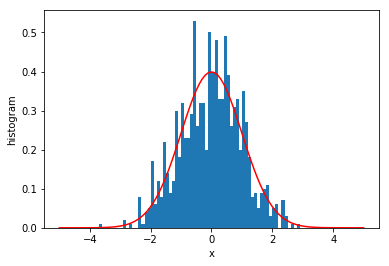

In [15]:
count = 1000
sample = np.empty(count)

# wybieramy punkt początkowy
point = 0
value = pdf(point)

for i in range(count):
    sample[i] = point
    # we can try with different steps:(3., 10., 0.1)
    # będziemy odrzucać połowe pktów jeśli krok będzie 3. \
    #(wyznaczone doświadczalnie na wykresie na zajęciach ;D )
    point, value = rvs(pdf=pdf, step=3., point0=point, value0=value)

abscissa = np.linspace(-5., 5., 101)
plt.plot(abscissa, pdf(abscissa)/np.sqrt(2.*np.pi), color="red")    
plt.hist(sample, density=True, range=(-5., 5.), bins=100)
plt.ylabel("histogram")
plt.xlabel("x")
plt.show()

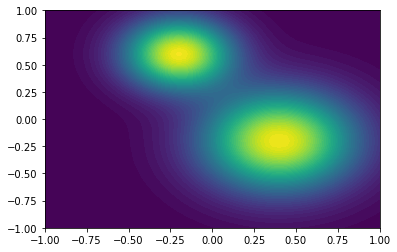

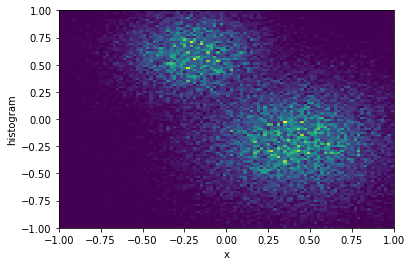

In [30]:
def rvs(pdf, step, point0, value0):
    
    # losujemy liczbę z rokładu płaskiego z przedziału <-1;1>
    point1 = point0 + step * (2. * np.random.random(point0.shape) - 1.) # x'
    value1 = pdf(point1)   # p(x')
    return (point1, value1) if (np.random.random() < value1/value0) else (point0, value0)

# Rozkład
def pdf(sample):
    return np.exp(-((sample - np.array([-0.2, 0.6]))**2 / 0.1).sum(-1)) + np.exp(-((sample - np.array([0.4, -0.2]))**2 / 0.2).sum(-1))

abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 51), np.linspace(-1., 1., 51))
plt.contourf(abscissa1, abscissa2, pdf(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 50)
plt.ylabel("")
plt.xlabel("")
plt.show()

plt.figure()

count = 1000000
sample = np.empty((count,2))
point = np.zeros(2)
value = pdf(point)

for i in range(count):
    sample[i] = point
    # we can try with different steps:(3., 10., 0.1)
    # będziemy odrzucać połowe pktów jeśli krok będzie 3. \
    #(wyznaczone doświadczalnie na wykresie na zajęciach ;D )
    point, value = rvs(pdf=pdf, step=3., point0=point, value0=value)


plt.hist2d(sample[:,0], sample[:,1], range=[[-1.,1.],[-1.,1.]], bins=100)
plt.ylabel("histogram")
plt.xlabel("x")
plt.show()

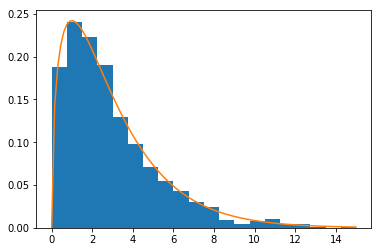

In [32]:
# Rozkład Chi2
from scipy import stats 

size = 3 #size of sample
count = 1000 #nb of samples

samples = (stats.norm.rvs(size=(count,size))**2).sum(1)
plt.hist(samples, density=True, range=(0., 15.), bins=20)

abscissa = np.linspace(0., 15., 101)
plt.plot(abscissa, stats.chi2.pdf(abscissa, size))
plt.show()

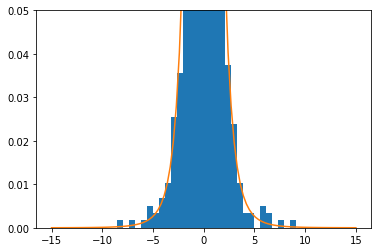

In [58]:
# Rozkład t-Studenta

import numpy as np
from scipy import stats

dof = 4 #degrees of freedom
count = 1000 #nb of samples

samples = stats.norm.rvs(size=count)/np.sqrt(stats.chi2.rvs(dof, size=count)/dof)
plt.hist(samples, density=True, range=(-15., 15.), bins=51)

abscissa = np.linspace(-15., 15., 101)
plt.plot(abscissa, stats.t.pdf(abscissa,dof))
#plt.ylim(0,0.05)
plt.show()

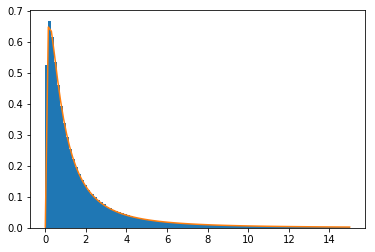

In [7]:
# Rozkład F Snedecora
# Rozkład F Fishera
# ew. Rozkład F Snedecora-Fishera ;p

import numpy as np
from scipy import stats

dof1 = 3 #degrees of freedom
dof2 = 3
count = 10000000 #nb of samples

samples = stats.chi2.rvs(dof1, size=count)/dof1 /stats.chi2.rvs(dof2, size=count)*dof2
plt.hist(samples, density=True, range=(0., 15.), bins=101)

abscissa = np.linspace(0.000001, 15., 101)
plt.plot(abscissa, stats.f.pdf(abscissa, dof1, dof2))
#plt.ylim(0,0.05)
plt.show()

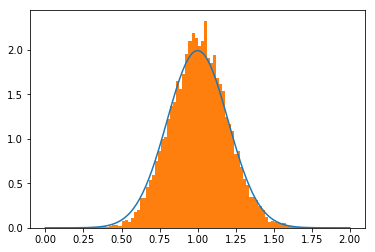

In [9]:
# Bootstrap

expected = 1.
dispersion = 2.
size = 100

sample = stats.norm.rvs(loc=expected, scale=dispersion, size=size)

count = 10000 # tyle powtórnych próbek
re_averages = np.empty(count)

for i in range(count):
    resample = sample[np.random.randint(sample.size, size=sample.size)]
    re_averages[i] = resample.mean()

abscissa = np.linspace(0., 2., 101)    
plt.plot(abscissa, stats.norm.pdf(abscissa, loc=expected, scale=dispersion/np.sqrt(size)))
plt.hist(re_averages, density=True, range=(0., 2.), bins=100)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


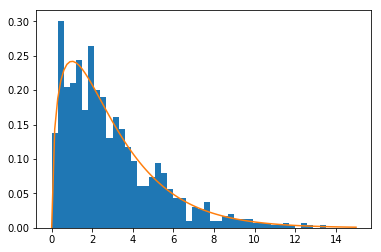

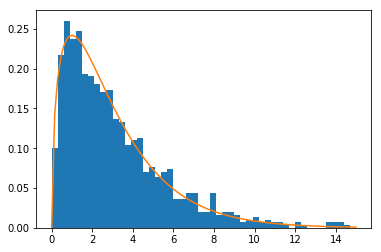

In [2]:
import numpy
from scipy import stats
from matplotlib import pyplot

dof = 3
count = 1000 #number of samples

pyplot.figure()

samples = stats.chi2.rvs(dof, size = count)
pyplot.hist(samples, normed = True, range = (0., 15.), bins = 50)

abscissa = numpy.linspace(0., 15., 101)
pyplot.plot(abscissa, stats.chi2.pdf(abscissa, dof))

pyplot.figure()

distro = stats.chi2(dof)

samples = distro.rvs(count)
pyplot.hist(samples, normed = True, range = (0., 15.), bins = 50)

abscissa = numpy.linspace(0., 15., 101)
pyplot.plot(abscissa, distro.pdf(abscissa))

pyplot.show()
